# Predictive modeling of customer bookings


## Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
# Libraries required for visaulization
import matplotlib.pyplot as plt 
import seaborn as sns
#Libraries required for data importing and data manupulation
import numpy as np 
import pandas as pd 
import math
#  Libraries required for Data Pre-processing and transformation
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

#Data pre processing
import category_encoders
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler 


In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


### Descriptive Statistics

For understanding the variables we use descriptive statistics to compute the measures of central tendency like count, minimum, maximum, mean , mode and measures of dispersion like standard deviation, quartiles, etc which explains the spread of the variables.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

We assign a number to the days of the week

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


As sales_channel, trip_type, route and booking_origin are categorical variables, we compute mode to see the most frequent observation

In [6]:
mode1 = df.sales_channel.mode()[0]
mode2 = df.trip_type.mode()[0]
mode3 = df.route.mode()[0] 
mode4 = df.booking_origin.mode()[0]

print(f"mode of sales_channel = {mode1}")
print(f"mode of trip_type = {mode2}")
print(f"mode of route = {mode3}")
print(f"mode of booking_origin = {mode4}")

mode of sales_channel = Internet
mode of trip_type = RoundTrip
mode of route = AKLKUL
mode of booking_origin = Australia


So here we can see that most of the booking searches were done through Internet, most of the trips were RoundTrip, most of routes were Aukland to Kuala Lumpur and most of the booking origins were Australia.

### Univariate Analysis

We start by visualising a single variable.

We have used Count plots for representing the categorical variables and boxplot for representing the continuous variables.

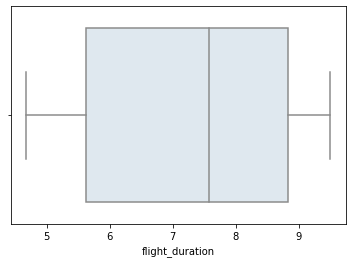

In [7]:
from matplotlib.pyplot import figure 
sns.set_palette("BuPu")
#Setting figure dimensions figure(figsize=(6, 4), dpi=100) #Plotting boxplot
sns.boxplot(x = 'flight_duration', data = df) 
plt.show()
plt.close()

[Text(0, 0, 'Incomplete'), Text(0, 1, 'Complete')]

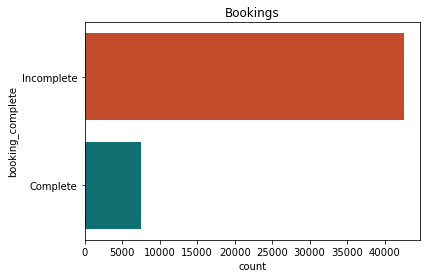

In [8]:
#Plotting the countplot using seaborn
ax = sns.countplot(y=df['booking_complete'],palette=['#db3d13',"#008080"]) 
ax.set_title('Bookings')
ax.set_yticklabels(['Incomplete','Complete'])

### Bivariate Analysis

Bivariate Analysis is the analysis between two variables to determine the relationship between them.
Box-plots, scatter plots, stacked bar plots, line graphs are majorly used for visualization of the data.

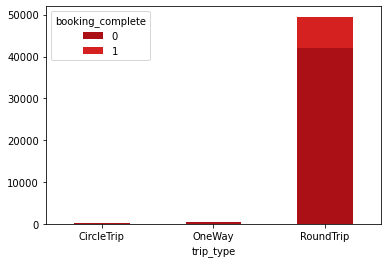

In [9]:
sns.set_palette("Reds_r")
contingency_table = pd.crosstab(df['trip_type'], df['booking_complete'])
# plotting the above contingency table
axy=contingency_table.plot(kind="bar", stacked = True, rot = 0)

In [10]:
#Replacing the values by nan
df.replace('Data missing or out of range', np.nan, inplace=True)
#verifying the number of missing/null values in our dataset
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

### Target Encoding

Target encoding is great for: High-cardinality features: A feature with a large number of categories can be troublesome to encode: a one-hot encoding would generate too many features and alternatives, like a label encoding, might not be appropriate for that feature.

Over here, booking_origin and route have large number of categories

In [11]:
encoder = TargetEncoder()
df['booking_origin'] = encoder.fit_transform(df['booking_origin'],df['booking_complete'])
df['route'] = encoder.fit_transform(df['route'],df['booking_complete'])
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,0.07478,0.050279,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,0.07478,0.050279,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,0.07478,0.103150,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,0.07478,0.050279,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,0.07478,0.103150,1,0,1,5.52,0


### Encoding rest of the categorical variables

We use category encoder to encode sales_channel and trip_type as they don't have large number of categories

In [12]:
encoded_column = pd.get_dummies(df['sales_channel'],drop_first = False)
df = pd.concat([df.drop(labels=['sales_channel'],axis=1),encoded_column],axis=1)

encoded_column2 = pd.get_dummies(df['trip_type'],drop_first = False)
df = pd.concat([df.drop(labels=['trip_type'],axis=1),encoded_column2],axis=1)

df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Internet,Mobile,CircleTrip,OneWay,RoundTrip
0,2,262,19,7,6,0.07478,0.050279,1,0,0,5.52,0,1,0,0,0,1
1,1,112,20,3,6,0.07478,0.050279,0,0,0,5.52,0,1,0,0,0,1
2,2,243,22,17,3,0.07478,0.103150,1,1,0,5.52,0,1,0,0,0,1
3,1,96,31,4,6,0.07478,0.050279,0,0,1,5.52,0,1,0,0,0,1
4,2,68,22,15,3,0.07478,0.103150,1,0,1,5.52,0,1,0,0,0,1


### Scaling variables

All the variables have different scales, hence we normalise the features using standard scalar.

In [13]:
scaler = StandardScaler()
# take the target variable out before scaling
df_target = df["booking_complete"].values 
df_predictors = df.drop("booking_complete", axis=1)
# fit_transform returns a NumPy array, so we need to put it back
# into a Pandas dataframe
scaled_vals = scaler.fit_transform(df_predictors)
df = pd.DataFrame(scaled_vals, columns=df_predictors.columns)
# put the non-scaled target back in
df['booking_complete'] = df_target
pd.options.display.max_columns = 200 # inspect the data

df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,CircleTrip,OneWay,RoundTrip,booking_complete
0,0.400684,1.957530,-0.119353,-0.381764,1.096754,-0.66267,-0.919966,0.703747,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
1,-0.579559,0.299164,-0.089844,-1.120780,1.096754,-0.66267,-0.919966,-1.420965,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
2,0.400684,1.747470,-0.030824,1.465775,-0.408687,-0.66267,-0.430523,0.703747,1.538654,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
3,-0.579559,0.122272,0.234761,-0.936026,1.096754,-0.66267,-0.919966,-1.420965,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
4,0.400684,-0.187290,-0.030824,1.096267,-0.408687,-0.66267,-0.430523,0.703747,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0


**Target Variable** - booking_complete

In [14]:
from sklearn.model_selection import GridSearchCV
# drop labels for training set, but keep all others

trainset = df.drop("booking_complete", axis=1) 
testset = df["booking_complete"].copy() 
print("Dataset Size : ", trainset.shape, testset.shape)

Dataset Size :  (50000, 16) (50000,)


### Cross Validation performance plot

We can plot the cross-validation performance of models by passing it whole dataset.Scikit-plot provides a method named plot_learning_curve() as a part of the estimators module which accepts estimator, X, Y, cross-validation info, and scoring metric for plotting performance of cross-validation on the dataset.

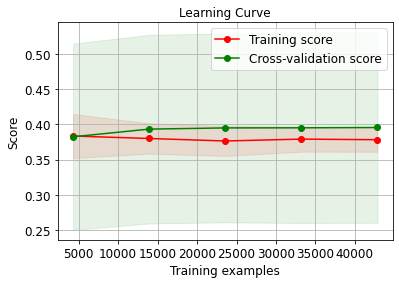

In [15]:
skplt.estimators.plot_learning_curve(LogisticRegression(), trainset, testset,
                                     cv=7, shuffle=True, scoring="average_precision",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Learning Curve");


So, on this curve we can see both the training and the cross-validation score. Both the scores don't change much, but the difference between them is still low.

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model. Over here the target variable is booking_complete.

In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(trainset,testset,train_size=0.8,stratify=testset,random_state=1)

In [17]:
lr_classif = LogisticRegression()
lr_classif.fit(Xtrain, ytrain)
lr_classif.score(Xtest, ytest)

0.8485

We got the score more than 0.8 which is a very good score, suggesting that our model is performing well.

In [18]:
Xtrain.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,CircleTrip,OneWay,RoundTrip
46865,1.380928,1.736415,-0.502977,1.281021,1.096754,0.647722,1.799317,0.703747,-0.649919,-0.863497,0.195370,0.355785,-0.355785,-0.048222,-0.08832,0.100808
28105,0.400684,-0.706912,-0.591506,0.726759,-0.408687,-0.327539,-0.447294,-1.420965,1.538654,1.158082,-0.439297,0.355785,-0.355785,-0.048222,-0.08832,0.100808
39219,0.400684,-0.817469,-0.532487,0.357251,1.598567,1.491933,0.511434,0.703747,-0.649919,-0.863497,-0.439297,0.355785,-0.355785,-0.048222,-0.08832,0.100808
9010,-0.579559,0.066993,-0.178372,0.911513,0.093127,-0.592744,-0.919236,-1.420965,-0.649919,-0.863497,1.037139,-2.810688,2.810688,-0.048222,-0.08832,0.100808
48706,-0.579559,-0.441573,-0.502977,0.911513,-1.412314,0.418708,0.511434,-1.420965,1.538654,1.158082,-0.572911,0.355785,-0.355785,-0.048222,-0.08832,0.100808


In [19]:
ytrain.head()

46865    0
28105    0
39219    0
9010     0
48706    1
Name: booking_complete, dtype: int64

In [20]:
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

Our target variable is imbalanced due to which the model might consider only the majority class and ignore the minority completely. Hence we use the method of random oversampling which creates duplicates of the minority variables.
Here our majority is **'0- Not complete'**.

In [21]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(sampling_strategy='minority') 
Xtrain, ytrain = over.fit_resample(Xtrain,ytrain)

### Decision Tree

Decision Tree is a Supervised Machine Learning Algorithm that makes decisions based on a set of rules, similar to how people do. We use the DecisionTreeClassifier to fit the classification model.

In [22]:
import time
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier(random_state=7)
# specify the hyperparameters and their values
param_grid = { 
    'max_depth':[3,7,10,15,20,25,30,35,40,45,50]
}
# max_depth: Maximum number of levels in tree
grid_search = GridSearchCV(dtc, param_grid, cv=5, 
                           scoring='f1_macro',
                           return_train_score=True,
                           n_jobs = -1)
#Noting the time taken for the model

start = time.time() 
grid_search.fit(Xtrain, ytrain) 
end = time.time() - start 
print(f"Took {end} seconds")

Took 4.485980749130249 seconds


In [23]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=35, random_state=7)

In [24]:
grid_search.best_score_

0.92919030458943

In [25]:
best_model_index = grid_search.cv_results_["rank_test_score"].tolist().index(1)
best_model_index

7

We can see that the maximum depth of the decision tree is 35 and the best score obtaines is 0.9287. But we can use a better model which is a Random Forest that consists of many decision trees.

In [26]:
import os
from joblib import dump
# create a folder where all trained models will be kept
if not os.path.exists("models"): os.makedirs("models")
dump(grid_search.best_estimator_, 'models/dtc-clf.joblib')

['models/dtc-clf.joblib']

### Random Forest

In [27]:
rf = RandomForestClassifier(random_state=7)

# specify the hyperparameters and their values
param_grid = {
'n_estimators': [300,400], 'max_depth': [15,20,25]
}
# we'll use 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1_macro',
return_train_score=True, n_jobs = -1)

start = time.time() 
grid_search.fit(Xtrain, ytrain) 
end = time.time() - start 
print(f"Took {end} seconds")

Took 207.79269814491272 seconds


In [28]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=25, n_estimators=300, random_state=7)

In [29]:
grid_search.best_score_

0.9517731115403525

In [30]:
best_model_index = grid_search.cv_results_["rank_test_score"].tolist().index(1) 
best_model_index

4

We can see that the maximum depth of the random forest is 25 and the estimators are 300 and the best score obtained i.e. the f-score is 0.9518.

In [31]:
from joblib import load
best_rf = load("models/rf-clf.joblib")
from sklearn.metrics import precision_recall_fscore_support 
yhat = best_rf.predict(Xtest)
p, r ,f ,s = precision_recall_fscore_support(ytest, yhat, average ="macro") 
print("Random Forest")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

Random Forest
Precision: 0.6651222651222651
Recall: 0.629086783948164
F-score: 0.6428928284436038


We can see that our model is overfitting as it is performing very well on the training data and low on testing. This model is able to predict with an accuracy of 64%

### Feature Importance

Feature importance scores simply represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict 'booking_complete'.

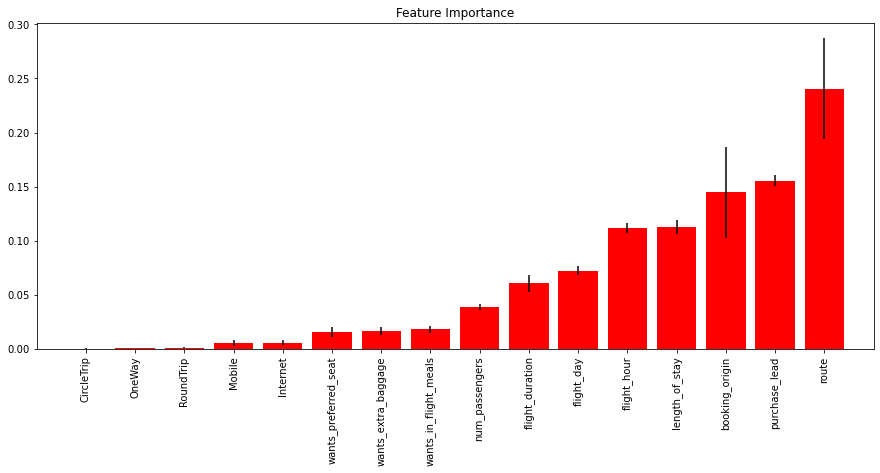

In [32]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot()
skplt.estimators.plot_feature_importances(best_rf, feature_names=Xtrain.columns,
                                         title="Feature Importance",
                                         x_tick_rotation=90, order="ascending",
                                         ax=ax1);


We can see that the trip type is not an important feature while prediting the booking behaviour but the route is the most important feature.

In [33]:
import os
from joblib import dump
# create a folder where all trained models will be kept
if not os.path.exists("models"): os.makedirs("models")
dump(grid_search.best_estimator_, 'models/rf-clf.joblib')

['models/rf-clf.joblib']

### Neural Network

We use the method of Neural Network which tries to recognise the patterns as the human brain does with the help of neurons. We use the Multi-Layer Perceptron for the computing it.

In [34]:
from sklearn.neural_network import MLPClassifier 
nn = MLPClassifier(random_state=7, max_iter = 300)
# specify the hyperparameters and their values
param_grid = { 
    'hidden_layer_sizes':[(50,2),(75,),(100,)], 
    'activation':['identity','logistic','tanh','relu']
}
grid_search = GridSearchCV(nn,param_grid,cv=5, 
                           scoring='f1_macro',
                           return_train_score=True, 
                           n_jobs = -1)
start = time.time() 
grid_search.fit(Xtrain, ytrain) 
end = time.time() - start 
print(f"Took {end} seconds")

Took 829.2239239215851 seconds


/Users/prachideshkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [35]:
grid_search.best_estimator_

MLPClassifier(activation='tanh', max_iter=300, random_state=7)

In [36]:
grid_search.best_score_

0.7604563170544061

In [37]:
import os
from joblib import dump
# create a folder where all trained models will be kept
if not os.path.exists("models"): 
    os.makedirs("models")
dump(grid_search.best_estimator_, 'models/nn-clf.joblib')

['models/nn-clf.joblib']

In [38]:
best_nn = load("models/nn-clf.joblib")
from sklearn.metrics import precision_recall_fscore_support 
yhat = best_nn.predict(Xtest)

p, r ,f ,s = precision_recall_fscore_support(ytest, yhat, average ="macro") 
print("Neural Network")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F-score: {f}")

Neural Network
Precision: 0.6143890316519343
Recall: 0.7012472268476364
F-score: 0.6147230352081328


We can see that the best activation function for the model is tanh. It is slightly overfitting but it is less than 1% so neural network is able to predict with an accuracy of 61%.

### Confusion Matrix

The confusion matrix let us analyze how our classification algorithm is doing for various classes of data.

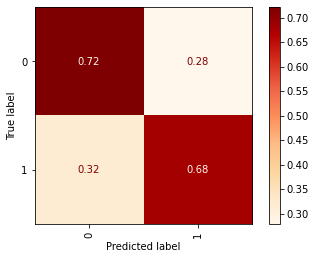

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay 
ax = ConfusionMatrixDisplay.from_predictions(ytest, yhat, labels = best_nn.classes_,
xticks_rotation ="vertical", normalize = "true",cmap = 'OrRd')

The model is able to predict completed bookings with a precision of **67%** and incomplete bookings with a precision of **73%**

## Conclusion

1) Bookings that are not yet complete outnumber those that are.

2) The learning curve shows an average fit and has less bias.

3) The number of days between the travel date and the booking date impacts customer buying behaviour the most, whereas the trip type does not have any influence.

4) The model is able to predict completed bookings with a precision of 67% and incomplete bookings with a precision of 73%.